In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#----------------PERFORMING ETL-------------------------

# Reading file
mydata=pd.read_csv(r"D:\Real projects Data analysis\Youtube\UScomments.csv",error_bad_lines= False)

#printing the data
print(mydata)

#print top 5 rows
mydata.head()

#Checking null values AND sum of missing values

mydata.isnull().sum()

#dropping na values and saving it

mydata.dropna(inplace=True)
mydata.isnull().sum()

#------------Performin sentiment analysis-------------------

# -1 negative sentiment , 0 neutral , 1 postive sentiment
#installing textblob

from textblob import TextBlob
mydata.head(6)

C:\Users\SUNITA DAS\AppData\Local\Temp\ipykernel_3508\1319737592.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  mydata=pd.read_csv(r"D:\Real projects Data analysis\Youtube\UScomments.csv",error_bad_lines= False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\SUNITA DAS\AppData\Local\Temp\ipykernel_3508\1319737592.py:9: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  mydata=pd.read_csv(r"D:\Real projects Data analysis\Youtube\UScomments.csv",error_bad_lines= False)


           video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691395  EoejGgUNmVU                                             Лучшая     1   
691396  EoejGgUNmVU  qu'est ce que j'aimerais que tu viennes à Roan...     0   
691397  EoejGgUNmVU                          Ven a mexico! 😍 te amo LP     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   
691399  EoejGgUNmVU  Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...     0   

       replies  
0            0  
1    

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [3]:
#checking sentiments

TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [4]:
#checking sentiments of all values
polarity = []

for comment in mydata['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [5]:
len(polarity)

691375

In [6]:
mydata['polarity'] =polarity

mydata.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [8]:
#--------------------wordcloud Analysis--------------------
#graphical representation of text data so we can understand which are the important words.

#now checking positive words - polarity 1
filter1= mydata['polarity']==1

filter1

filter2= mydata['polarity']==-1

postive =mydata[filter1]

negative =mydata[filter2]

In [58]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 300.0/300.0 kB 975.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
from wordcloud import WordCloud ,STOPWORDS 

#STODWORDS ARE MEANINGLESS WORDS IS,THE,AN

set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [10]:
type(mydata['comment_text'])

pandas.core.series.Series

In [17]:
#converting series to string as wordcloud need this in string
total_comments_positive=' '.join(postive['comment_text'])

In [18]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

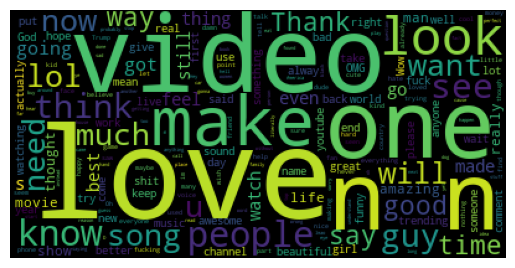

In [16]:
#GRAPHICAL REPRESENTATION

plt.imshow(wordcloud)
plt.axis("off")

In [20]:
#wordcloud for negative words
total_comments_negative=' '.join(negative['comment_text'])
wordcloud2=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

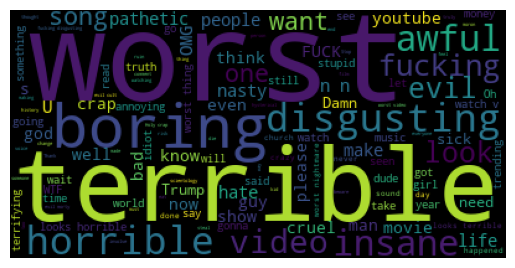

In [21]:
plt.imshow(wordcloud2)
plt.axis("off")

In [7]:
#--------------------Emoji Analysis-------------------------------
!pip install emoji==2.2.0

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 240.9/240.9 kB 422.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234936 sha256=8a06012990903eff4a8544fe7f6129bc3ecd85bb7a0817e10dfb209b506fdac0
  Stored in directory: c:\users\sunita das\appdata\local\pip\cache\wheels\80\20\48\a9171ff16fe85966efc66492a9aed0acabb17e96c35f696dbf
Successfully built emoji


In [8]:
import emoji

In [14]:
mydata['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [15]:
#extract emoji from comment_text

comment1 ="trending 😉"
[char for char in comment1 if char in emoji.EMOJI_DATA]

['😉']

In [17]:
#MORE readable format

emoji_list =[]

for char in comment1:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)
emoji_list

['😉']

In [21]:
#EXTRACTING ALL THE ENOJIS

all_emoji=[]

for comment in mydata['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji.append(char)
    
all_emoji[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [22]:
#count of emojis
#collection package can leveage this

from collections import Counter
Counter(all_emoji).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [23]:
Counter(all_emoji).most_common(10)[0]

('😂', 36987)

In [25]:
Counter(all_emoji).most_common(10)[1][0]

'😍'

In [26]:
allemoji=[Counter(all_emoji).most_common(10)[i][0] for i in range(10)]

In [27]:
allemoji

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [37]:
allcount=[Counter(all_emoji).most_common(10)[i][1] for i in range(10)]
allcount

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [38]:
#graphical reperesentaiton

import plotly.graph_objs as go
from plotly.offline import iplot

trace=go.Bar(x=allemoji ,y=allcount)

In [39]:
iplot([trace])

In [41]:
#-------------collect entire data and prep the data---------------------


import os

files =os.listdir(r"D:\Real projects Data analysis\Youtube\additional_data")
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [45]:
files_csv=[file for file in files if '.csv' in file]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [47]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [49]:
#define blank data frame 
#create data frame for each file.
full_df=pd.DataFrame()
path=r"D:\Real projects Data analysis\Youtube\additional_data"

for file in files_csv:
    current_df=pd.read_csv(path+'/'+file, encoding='iso=8859-1',error_bad_lines=False)
    full_df=pd.concat([full_df,current_df],ignore_index=True)

In [50]:
full_df.shape
#this is actually raw data now we will clean it

(375942, 16)

In [52]:
#---------------export data in file format - csv json db-------------------------
#removing duplicates 


full_df.duplicated() # False meanins not duplicates line
full_df[full_df.duplicated()].shape

(36417, 16)

In [53]:
full_df=full_df.drop_duplicates()  # dropped duplicates


In [54]:
full_df.shape

(339525, 16)

In [56]:
#exporting to csv

full_df.to_csv(r"D:\Real projects Data analysis\Youtube\additional_data\exported.csv", index=False)

#exporting to Json

full_df.to_json(r"D:\Real projects Data analysis\Youtube\additional_data\exported.json")



In [57]:
#---------------Which category has maximum likes-----------------
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [58]:
#As we don't have category name column first we will create a dictionary od cat ID and category namr

#find the unique category ids in full df

full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [62]:
#first read a json file from folder 
json_df=pd.read_json(r"D:\Real projects Data analysis\Youtube\additional_data\US_category_id.json")

json_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [64]:
#to get category id and category name dictionary

cat_dict={}

for item in json_df['items'].values:
    cat_dict[int(item['id'])]=item['snippet']['title']
    
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [68]:
full_df['category_name']=full_df['category_id'].map(cat_dict)
full_df['category_name']

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
                ...       
375936      People & Blogs
375938      People & Blogs
375939       Entertainment
375940    Film & Animation
375941              Gaming
Name: category_name, Length: 339525, dtype: object

In [69]:
full_df


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375936,1PhPYr_9zRY,18.14.06,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",People & Blogs
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

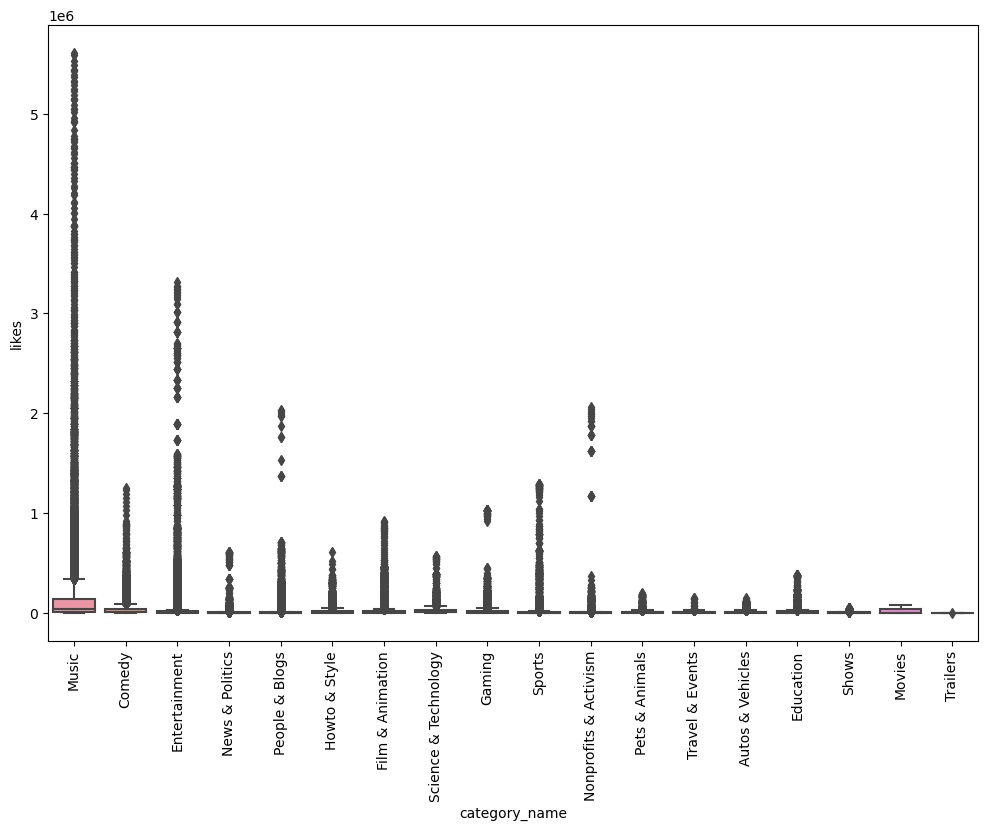

In [71]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation='vertical')

In [72]:
#-------------------whether audience are engaged or not-------------------

full_df['like_rate']=full_df['likes']/full_df['views']*100
full_df['dislike_rate']=full_df['dislikes']/full_df['views']*100
full_df['comment_count_rate']=full_df['comment_count']/full_df['views']*100


In [73]:
full_df.columns


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

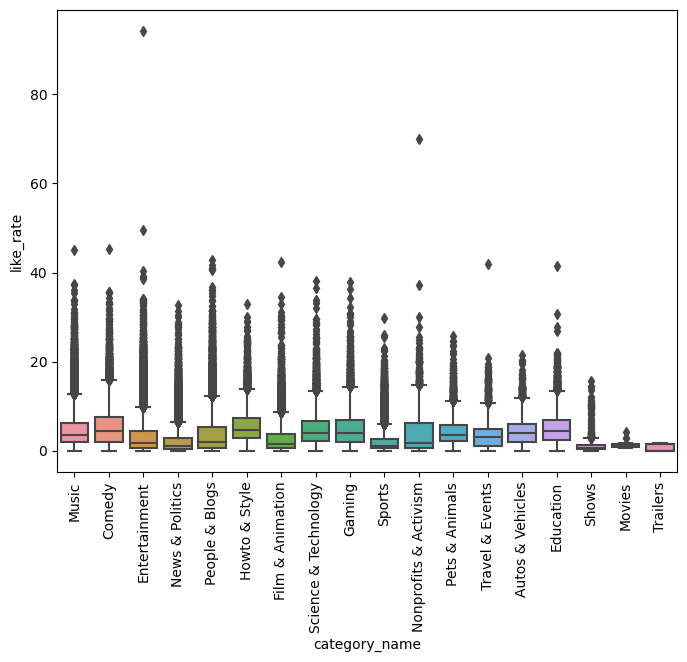

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name', y='like_rate', data=full_df)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='views', ylabel='likes'>

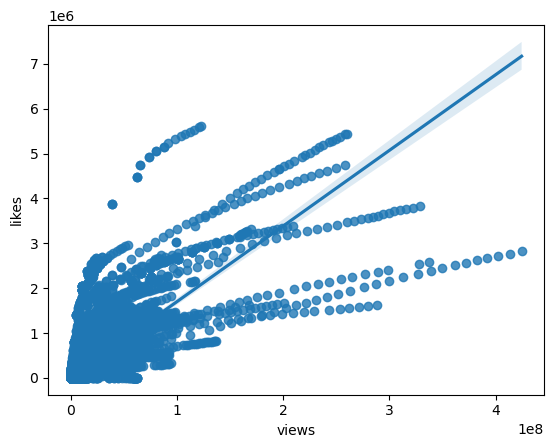

In [76]:
sns.regplot(x='views',y='likes', data=full_df)


#regplot is combination of scatter plot and reggresiion line

In [77]:
#access first three columns
#checking correlation
full_df[['views','likes','dislikes']].corr()


,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

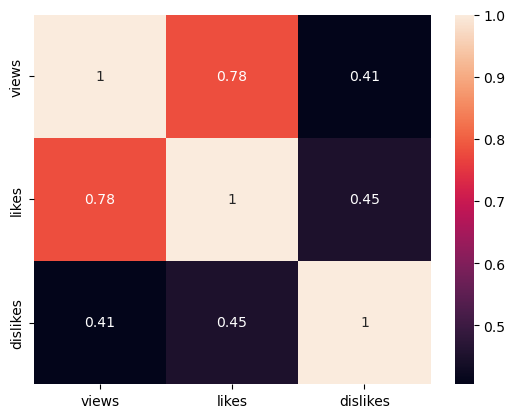

In [79]:
#corelation == if views increase my 100 then likes inscrease my 78
#visualising it in heatmaps

sns.heatmap(full_df[['views','likes','dislikes']].corr(),annot =True)

In [102]:
#------------which channe;s have the largest number of trending videos------------------

full_df['channel_title'].value_counts() 
 

The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: channel_title, Length: 37824, dtype: int64

In [103]:
#or we can got it by groupby
full_df.groupby(['channel_title']).size().sort_values() 


channel_title
Sariel's LEGOÂ® Workshop                1
Happy Elements K.K                      1
Happy End                               1
Happy Life                              1
Happy Life Channel                      1
                                     ... 
Jimmy Kimmel Live                     528
TheEllenShow                          555
Late Night with Seth Meyers           592
WWE                                   643
The Late Show with Stephen Colbert    710
Length: 37824, dtype: int64

In [104]:
cdf=full_df.groupby(['channel_title']).size().sort_values(ascending = False).reset_index()

In [112]:
cdf.rename(columns={0:'total_videos'},inplace= True)


In [113]:
import plotly.express as px

px.bar(data_frame = cdf[0:20], x='channel_title', y='total_videos')

#top 20 channels with videos

In [114]:
#---------------does punctuation in title and tags have an inpact on views and likes/dislikes-------------------------


full_df['title'][0] #first title


'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [115]:
#count of punctuation in title

import string

In [116]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [118]:
len([char for char in full_df['title'][0] if char in string.punctuation])

4

In [122]:
#count punctuation in all title

def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [123]:
full_df['title'].apply(punc_count)

0         4
1         1
2         3
3         3
4         3
         ..
375936    0
375938    1
375939    3
375940    0
375941    1
Name: title, Length: 339525, dtype: int64

In [124]:
full_df['count_punctuation']=full_df['title'].apply(punc_count)

In [125]:
full_df.columns


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate', 'count_punctuation'],
      dtype='object')

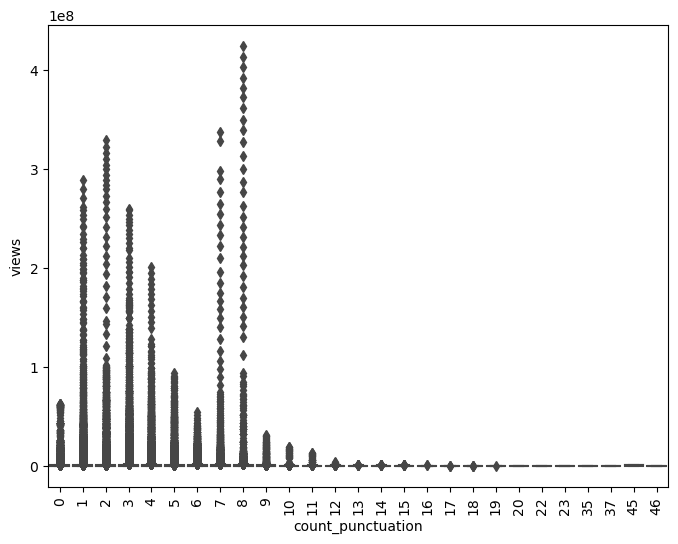

In [127]:
#box plot to identify the count of punctuation effects on view likes or dislikes


plt.figure(figsize=(8,6))
sns.boxplot(x='count_punctuation', y='views', data=full_df)
plt.xticks(rotation='vertical')
plt.show()

